*ASSIGNMENT 1: Given the dataset you are required to pre-process the data to prepare it for subseuqent classifcation tasks. The pre-processing tasks that you need to perform are given below. See instructions for completing and submitting the assignment.*

#Instructions

*   After uploading the notebook to your Google Drive, **Please add your Banner ID to the end of the file name**. So, the file name should look like "Assignment_1_B00123456.ipynb"
*   Please complete the required sections by adding as many code cells as you want to each section.
*   The only libraries that you may use are **NumPy, Pandas, Scikit-learn, matplotlib**.
*   You can use the material from the tutorials. Feel free to use any other methods or classes from the mentioned libraries that you think are suitable.
*   After finishing your work, please **run all the cells**, download the notebook (**.ipynb format**) and email it to **jaber.rad@dal.ca (also cc ssrabidi@dal.ca)**.
*   Please feel free to discuss any issues in the Teams channel.
*   **Good luck!**


---



# TASK 1: Access and read your data
*   **Please don't change the name of the CSV file that I sent to you.**
*   The only acceptable way of accessing data is **mounting your Google Drive account** and reading the CSV file from a Drive directory.
*   Please create a folder named **"Colab Notebooks"** on your Google Drive (if you don't have it already) and **upload your CSV file there**.




## Mount google drive and briefly view the data

In [280]:
# Load the Drive helper and mount
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/HINF6210/data/Dataset_Jack.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We were informed in class that missing values are represented as `?` in the data, so lets replace them with NAs during import

In [281]:
import pandas as pd
import numpy as np

data = pd.read_csv(path, na_values='?') # specify that ? are missing  

data.info() # view the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3075 non-null   float64
 1   sex                        2955 non-null   object 
 2   on thyroxine               3076 non-null   object 
 3   query on thyroxine         3076 non-null   object 
 4   on antithyroid medication  3076 non-null   object 
 5   sick                       3076 non-null   object 
 6   pregnant                   3076 non-null   object 
 7   thyroid surgery            3076 non-null   object 
 8   I131 treatment             3076 non-null   object 
 9   query hypothyroid          3076 non-null   object 
 10  query hyperthyroid         3076 non-null   object 
 11  lithium                    3076 non-null   object 
 12  goitre                     3076 non-null   object 
 13  tumor                      3076 non-null   objec

Also view the data briefly

In [282]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class
0,65.0,F,f,f,f,f,f,f,f,t,...,t,99.0,t,1.14,t,87.0,f,NaN,other,compensated hypothyroid.|3169
1,44.0,M,f,f,f,f,f,f,f,f,...,t,39.0,t,1.16,t,33.0,f,NaN,SVI,primary hypothyroid.|2427
2,65.0,M,f,f,f,f,f,f,f,f,...,t,61.0,t,0.85,t,72.0,f,NaN,SVI,compensated hypothyroid.|251
3,27.0,F,f,f,f,f,f,f,f,f,...,t,82.0,t,0.82,t,100.0,f,NaN,SVI,compensated hypothyroid.|2691
4,54.0,F,f,f,f,f,f,f,f,f,...,t,83.0,t,1.03,t,81.0,f,NaN,SVHC,compensated hypothyroid.|822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,29.0,F,f,f,f,f,f,f,f,f,...,t,144.0,t,1.17,t,123.0,f,NaN,other,negative.|3048
3072,74.0,M,f,f,f,f,f,f,f,t,...,t,102.0,t,0.90,t,114.0,f,NaN,SVI,negative.|1273
3073,70.0,M,f,f,f,f,f,f,f,f,...,t,106.0,t,0.92,t,115.0,f,NaN,SVI,negative.|2215
3074,62.0,F,f,f,f,f,f,f,f,f,...,t,113.0,t,1.14,t,99.0,f,NaN,other,negative.|983


# TASK 2: Data cleaning
*   Apply any data cleaning that you think is necessary.
*   Explain at the end what your rationale is.

Looks like there are spaces and capitalizations in the feature names, clean it to make it easier to work with.

In [283]:
data.columns=data.columns.str.lower().str.replace(' ','_')
data.columns.tolist()

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'i131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'tsh_measured',
 'tsh',
 't3_measured',
 't3',
 'tt4_measured',
 'tt4',
 't4u_measured',
 't4u',
 'fti_measured',
 'fti',
 'tbg_measured',
 'tbg',
 'referral_source',
 'class']

there are multiple string columns are would be better as `boolean` type for imputations later. so convert them now

In [284]:
data = data.replace({'t': True, 'f': False, 'M': True, 'F': False}) 
# turn strings into a boolean
# male = T, female = F, doing this to maintain any missing values 

data = data.rename(columns={"sex": "sex_male"}) # more informative name
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3075 non-null   float64
 1   sex_male                   2955 non-null   object 
 2   on_thyroxine               3076 non-null   bool   
 3   query_on_thyroxine         3076 non-null   bool   
 4   on_antithyroid_medication  3076 non-null   bool   
 5   sick                       3076 non-null   bool   
 6   pregnant                   3076 non-null   bool   
 7   thyroid_surgery            3076 non-null   bool   
 8   i131_treatment             3076 non-null   bool   
 9   query_hypothyroid          3076 non-null   bool   
 10  query_hyperthyroid         3076 non-null   bool   
 11  lithium                    3076 non-null   bool   
 12  goitre                     3076 non-null   bool   
 13  tumor                      3076 non-null   bool 

the `referral source` variable is a string with multiple categories, so better to one-hot encode them

In [285]:
data = pd.get_dummies(data, columns = ['referral_source'])
# apply name cleaning again
data.columns=data.columns.str.lower().str.replace(' ','_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3075 non-null   float64
 1   sex_male                   2955 non-null   object 
 2   on_thyroxine               3076 non-null   bool   
 3   query_on_thyroxine         3076 non-null   bool   
 4   on_antithyroid_medication  3076 non-null   bool   
 5   sick                       3076 non-null   bool   
 6   pregnant                   3076 non-null   bool   
 7   thyroid_surgery            3076 non-null   bool   
 8   i131_treatment             3076 non-null   bool   
 9   query_hypothyroid          3076 non-null   bool   
 10  query_hyperthyroid         3076 non-null   bool   
 11  lithium                    3076 non-null   bool   
 12  goitre                     3076 non-null   bool   
 13  tumor                      3076 non-null   bool 

Some  features (`sex`) were imported as an `object` so let's convert them to the appropriate datatype

In [286]:
data=data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3075 non-null   Int64  
 1   sex_male                   2955 non-null   boolean
 2   on_thyroxine               3076 non-null   boolean
 3   query_on_thyroxine         3076 non-null   boolean
 4   on_antithyroid_medication  3076 non-null   boolean
 5   sick                       3076 non-null   boolean
 6   pregnant                   3076 non-null   boolean
 7   thyroid_surgery            3076 non-null   boolean
 8   i131_treatment             3076 non-null   boolean
 9   query_hypothyroid          3076 non-null   boolean
 10  query_hyperthyroid         3076 non-null   boolean
 11  lithium                    3076 non-null   boolean
 12  goitre                     3076 non-null   boolean
 13  tumor                      3076 non-null   boole

convert pd NA into np NaN for the imputer later

In [287]:
data = data.replace(pd.NA, np.nan)

The `class` variable had text concatenated with some numbers, let's separate them

In [288]:
data[['target','class_number']] = data['class'].str.split(".", expand=True)
data['class_number'] = data['class_number'].str.replace('|','')
data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,age,sex_male,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tbg_measured,tbg,class,referral_source_stmw,referral_source_svhc,referral_source_svhd,referral_source_svi,referral_source_other,target,class_number
0,65,False,False,False,False,False,False,False,False,True,...,False,<NA>,compensated hypothyroid.|3169,0,0,0,0,1,compensated hypothyroid,3169
1,44,True,False,False,False,False,False,False,False,False,...,False,<NA>,primary hypothyroid.|2427,0,0,0,1,0,primary hypothyroid,2427
2,65,True,False,False,False,False,False,False,False,False,...,False,<NA>,compensated hypothyroid.|251,0,0,0,1,0,compensated hypothyroid,251
3,27,False,False,False,False,False,False,False,False,False,...,False,<NA>,compensated hypothyroid.|2691,0,0,0,1,0,compensated hypothyroid,2691
4,54,False,False,False,False,False,False,False,False,False,...,False,<NA>,compensated hypothyroid.|822,0,1,0,0,0,compensated hypothyroid,822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,29,False,False,False,False,False,False,False,False,False,...,False,<NA>,negative.|3048,0,0,0,0,1,negative,3048
3072,74,True,False,False,False,False,False,False,False,True,...,False,<NA>,negative.|1273,0,0,0,1,0,negative,1273
3073,70,True,False,False,False,False,False,False,False,False,...,False,<NA>,negative.|2215,0,0,0,1,0,negative,2215
3074,62,False,False,False,False,False,False,False,False,False,...,False,<NA>,negative.|983,0,0,0,0,1,negative,983


Describe the data

In [289]:
data.describe(include='all')

,age,sex_male,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tbg_measured,tbg,class,referral_source_stmw,referral_source_svhc,referral_source_svhd,referral_source_svi,referral_source_other,target,class_number
count,3075.000000,2955,3076,3076,3076,3076,3076,3076,3076,3076,...,3076,0,3076,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076,3076
unique,NaN,2,2,2,2,2,2,2,2,2,...,1,NaN,3076,NaN,NaN,NaN,NaN,NaN,4,3076
top,NaN,False,False,False,False,False,False,False,False,False,...,False,NaN,compensated hypothyroid.|3169,NaN,NaN,NaN,NaN,NaN,negative,3169
freq,NaN,2043,2706,3040,3045,2961,3036,3029,3025,2868,...,3076,NaN,1,NaN,NaN,NaN,NaN,NaN,2785,1
mean,51.932683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,NaN,0.031209,0.102731,0.009428,0.276008,0.580624,NaN,NaN
std,20.288430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,NaN,0.173911,0.303656,0.096654,0.447093,0.493537,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN


# TASK 3: Convert the target variable into "negative vs. positive"

Looks like there are 4 unique values. Will recode as follows::

* Negative = 0
* compensated hypothyroid = 1
* primary hypothyroid = 1
* secondary hypothyroid = 1

In [290]:
pd.value_counts(data.target);

In [291]:
import numpy as np

data['target'] = np.where(data['target'] == "negative", 0, 1)

Check to see the recoding was good. Looks it it adds up.

In [292]:
pd.value_counts(data.target)

0    2785
1     291
Name: target, dtype: int64

Let's convert target to a `boolean`

In [293]:
data=data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3075 non-null   Int64  
 1   sex_male                   2955 non-null   boolean
 2   on_thyroxine               3076 non-null   boolean
 3   query_on_thyroxine         3076 non-null   boolean
 4   on_antithyroid_medication  3076 non-null   boolean
 5   sick                       3076 non-null   boolean
 6   pregnant                   3076 non-null   boolean
 7   thyroid_surgery            3076 non-null   boolean
 8   i131_treatment             3076 non-null   boolean
 9   query_hypothyroid          3076 non-null   boolean
 10  query_hyperthyroid         3076 non-null   boolean
 11  lithium                    3076 non-null   boolean
 12  goitre                     3076 non-null   boolean
 13  tumor                      3076 non-null   boole

# TASK 4: Plot chart(s) to show the distribution of the target values

## Target looks very imbalanced

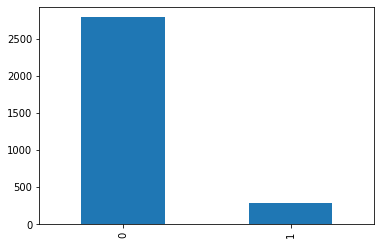

In [294]:
import matplotlib.pyplot as plt

data['target'].value_counts().plot(kind='bar');

# TASK 5: Handle missing values
1.   Show the rows that have missing values in any columns.
2.   Apply your method of choice to deal with the missing values.
3.   Explain why you chose the method (add a text cell to the end of the section).



There are 8 columns in total that have missing values.

In [295]:
missing = data.isnull().sum()
print(missing)

age                             1
sex_male                      121
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
i131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
tsh_measured                    0
tsh                           287
t3_measured                     0
t3                            632
tt4_measured                    0
tt4                           183
t4u_measured                    0
t4u                           314
fti_measured                    0
fti                           313
tbg_measured                    0
tbg                          3076
class                           0
referral_sourc

Since `sex_male` is a categorical variables, I could do 3 things:
1. Drop rows with missing sex
2. Replace missing with the mode
3. Make a model to predict missing `sex_male`
4. Or just let the MICE do its work on the model

I ultimate went with method 4 since MICE is a very robust method to impute data

In [296]:
# data=data.dropna(subset=['sex_male']) # dropping 121 rows, decided not to do this

I will use the MICE method to impute missing values for all numeric columns with missing values, except for `tbg` since the entire column is missing values.

Also counting the `tbg_measured` column to show that no `tbg` values were measured

In [297]:
data['tbg_measured'].value_counts()

False    3076
Name: tbg_measured, dtype: Int64

At this point, the `tbg` features will not be useful for prediction tasks, so I will remove these items from the dataset.

Also will remove the `class` and `class_number` variable since we already have a cleaned `target` variable

In [298]:
data=data.drop(['class', 'class_number', 'tbg', 'tbg_measured'], axis = 1)

The data now looks properly setup to apply imputations. All strings were removed or converted (which normally gives the imputers in python problems)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3075 non-null   Int64  
 1   sex_male                   2955 non-null   boolean
 2   on_thyroxine               3076 non-null   boolean
 3   query_on_thyroxine         3076 non-null   boolean
 4   on_antithyroid_medication  3076 non-null   boolean
 5   sick                       3076 non-null   boolean
 6   pregnant                   3076 non-null   boolean
 7   thyroid_surgery            3076 non-null   boolean
 8   i131_treatment             3076 non-null   boolean
 9   query_hypothyroid          3076 non-null   boolean
 10  query_hyperthyroid         3076 non-null   boolean
 11  lithium                    3076 non-null   boolean
 12  goitre                     3076 non-null   boolean
 13  tumor                      3076 non-null   boole

## Use Multiple Imputation by Chained Equations to impute missing values.

In [300]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

my_imputer = IterativeImputer(
  missing_values=np.nan,
  random_state=0,
  n_nearest_features=3,
  max_iter=1,
  sample_posterior=True,
)

imputed_data = pd.DataFrame(
  my_imputer.fit_transform(data), # impute
  columns = data.columns # specify column names as it returns numbers
)

imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3076 non-null   float64
 1   sex_male                   3076 non-null   float64
 2   on_thyroxine               3076 non-null   float64
 3   query_on_thyroxine         3076 non-null   float64
 4   on_antithyroid_medication  3076 non-null   float64
 5   sick                       3076 non-null   float64
 6   pregnant                   3076 non-null   float64
 7   thyroid_surgery            3076 non-null   float64
 8   i131_treatment             3076 non-null   float64
 9   query_hypothyroid          3076 non-null   float64
 10  query_hyperthyroid         3076 non-null   float64
 11  lithium                    3076 non-null   float64
 12  goitre                     3076 non-null   float64
 13  tumor                      3076 non-null   float

# TASK 6: Show the pre-processed data and confirm there is no missing values

No more missing data after imputing with MICE (Multiple Imputation with Chained Equations) - also called IterativeImpute in `pandas`

In [301]:
imputed_data.isnull().sum()

age                          0
sex_male                     0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
i131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
referral_source_stmw         0
referral_source_svhc         0
referral_source_svhd         0
referral_source_svi          0
referral_source_other        0
target                       0
dtype: i

## Final look of the data

In [302]:
imputed_data

,age,sex_male,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,t4u_measured,t4u,fti_measured,fti,referral_source_stmw,referral_source_svhc,referral_source_svhd,referral_source_svi,referral_source_other,target
0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.14,1.0,87.0,0.0,0.0,0.0,0.0,1.0,1.0
1,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.16,1.0,33.0,0.0,0.0,0.0,1.0,0.0,1.0
2,65.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.85,1.0,72.0,0.0,0.0,0.0,1.0,0.0,1.0
3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.82,1.0,100.0,0.0,0.0,0.0,1.0,0.0,1.0
4,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.03,1.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.17,1.0,123.0,0.0,0.0,0.0,0.0,1.0,0.0
3072,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.90,1.0,114.0,0.0,0.0,0.0,1.0,0.0,0.0
3073,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.92,1.0,115.0,0.0,0.0,0.0,1.0,0.0,0.0
3074,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.14,1.0,99.0,0.0,0.0,0.0,0.0,1.0,0.0


Very different when compared to the original data!

In [303]:
data_orig = pd.read_csv(path, na_values='?')  
data_orig.isnull().sum()

age                             1
sex                           121
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           287
T3 measured                     0
T3                            632
TT4 measured                    0
TT4                           183
T4U measured                    0
T4U                           314
FTI measured                    0
FTI                           313
TBG measured                    0
TBG                          3076
referral source                 0
class         

*The end!*